<a href="https://colab.research.google.com/github/DrTihami/DiabetesPredictionApp/blob/main/Copy_of_Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pip install scikit-learn==1.5.1

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

In [ ]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

In [ ]:
X.head()

In [ ]:
df.shape

In [ ]:
df['diabetes'].value_counts()

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(6, 6))
sns.histplot(df['age'])
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
categorical_vars = ['gender', 'hypertension', 'heart_disease', 'smoking_history', 'HbA1c_level', 'blood_glucose_level']
# defining the categorical variables to create multiple plots using one code
nrows = 2    #plotting the graphs on the same page
ncols = 3

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(categorical_vars):                       #creating for loop for all the variables
    ax = axs[i]
    sns.countplot(x=var, data=df, hue='diabetes', ax=ax)
    ax.set_title(f'Distribution of {var}')

plt.tight_layout()   #prevents overlapping
plt.show()

In [ ]:
df.info()

In [ ]:
print(df.info())
print(df.dtypes)


In [ ]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])

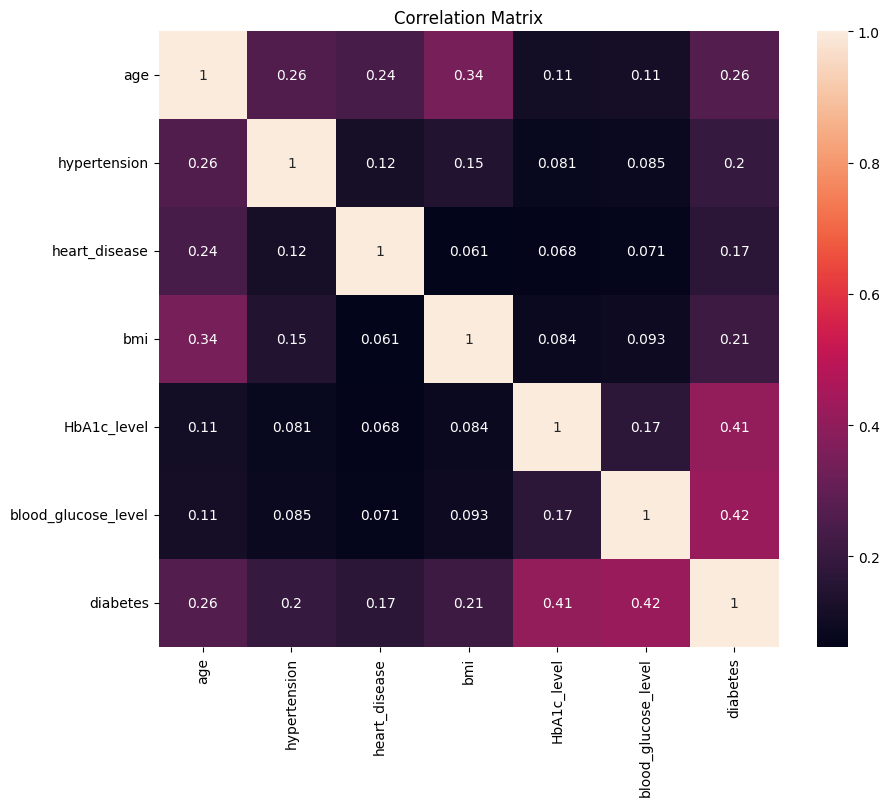

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

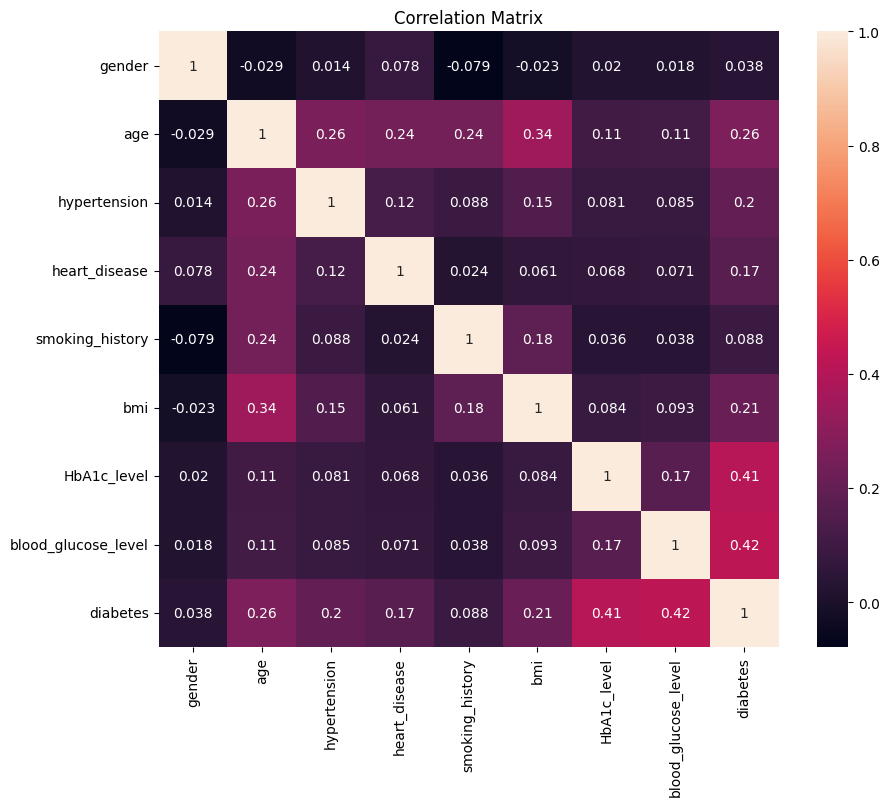

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Now you can compute the correlation matrix again
numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# converting the categorical values to numeric values
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
    if is_numeric_dtype(df[column]):
        continue
    else:
        df[column]=label.fit_transform(df[column])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
#handling the imbalanced dataset
from imblearn.combine import SMOTETomek

X = df.drop('diabetes', axis=1)
Y = df['diabetes']

smk = SMOTETomek(random_state=42)
X_resampled, Y_resampled = smk.fit_resample(X, Y)

resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns),
                          pd.DataFrame(Y_resampled, columns=['diabetes'])], axis=1)
resampled_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [ ]:
resampled_df['diabetes'].value_counts()

,count
diabetes,
0,87269
1,87269


In [ ]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
X = resampled_df.drop('diabetes', axis=1)
Y = resampled_df['diabetes']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(139630, 8)
(34908, 8)


In [ ]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
print("Accuracy:", accuracy)

[LightGBM] [Info] Number of positive: 69893, number of negative: 69737
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009787 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 808
[LightGBM] [Info] Number of data points in the train set: 139630, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500559 -> initscore=0.002234
[LightGBM] [Info] Start training from score 0.002234
Accuracy: 0.9734444826400825


In [ ]:
import pickle
# Saving the model and scaler object
with open('clf.pkl', 'wb') as file:
  pickle.dump(clf, file)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
clf_predict=clf.predict(X_test)
clf_predict
cr=classification_report(Y_test,clf_predict)
print (cr)

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17532
           1       0.99      0.95      0.97     17376

    accuracy                           0.97     34908
   macro avg       0.97      0.97      0.97     34908
weighted avg       0.97      0.97      0.97     34908



Text(50.722222222222214, 0.5, 'Actual value')

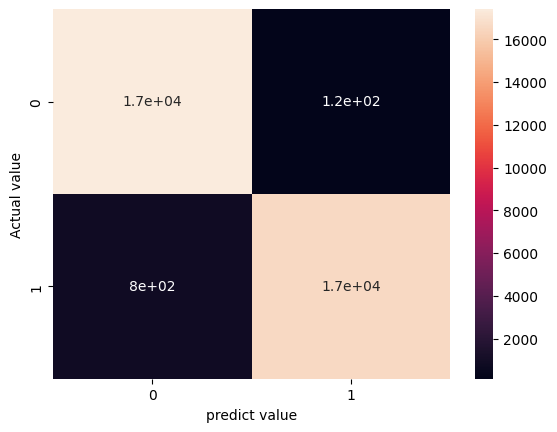

In [ ]:
cm = confusion_matrix(Y_test, clf_predict)
sns.heatmap(cm,annot=True)
plt.xlabel("predict value")
plt.ylabel('Actual value')

Text(50.722222222222214, 0.5, 'Actual value')

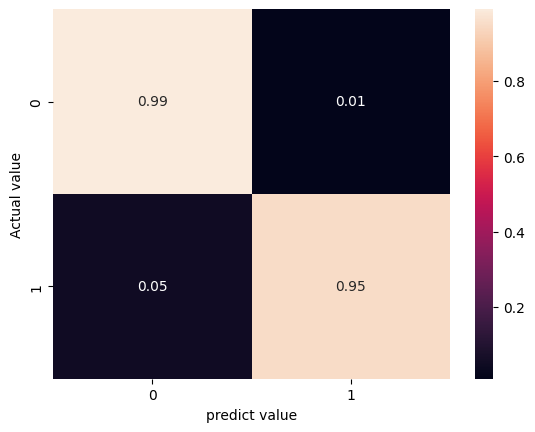

In [ ]:
cm = confusion_matrix(Y_test, clf_predict)
# Round the confusion matrix values to 2 decimal places
cm_rounded = cm.astype(float)  # Convert to float to enable decimal rounding
cm_rounded = cm_rounded / cm_rounded.sum(axis=1)[:, np.newaxis]  # Normalize by row sums if needed
cm_rounded = np.round(cm_rounded, 2)  # Round values
sns.heatmap(cm_rounded,annot=True)
plt.xlabel("predict value")
plt.ylabel('Actual value')

In [ ]:
# creating a predictive system
input_data = (0,36.0,0,0,1,23.45,5.0,155)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


prediction = clf.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic


In [ ]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
import pandas as pd
import pickle

# Load the trained model
with open('clf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
# Prepare input data
input_data = {
    'gender': [0],
    'age': [40],
    'hypertension': [0],
    'heart_disease': [0],
    'smoking_history': [0],
    'bmi': [22],
    'HbA1c_level': [5],
    'blood_glucose_level': [90]
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Predict the outcome
prediction = loaded_model.predict(input_df)
print('Prediction:', 'Diabetic' if prediction[0] == 1 else 'Not Diabetic')

Prediction: Not Diabetic


In [ ]:
import streamlit as st
import pandas as pd
import pickle

# Load the trained model
with open('clf.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Streamlit app
st.title('Diabetes Prediction App')

st.write("""
This app predicts the likelihood of diabetes based on the input features.
""")

# Define input fields(
gender = st.selectbox('Gender', options=['Male', 'Female'])
age = st.slider('Age', min_value=0, max_value=100, value=25)
hypertension = st.selectbox('Hypertension', options=['Yes', 'No'])
heart_disease = st.selectbox('Heart Disease', options=['Yes', 'No'])
smoking_history = st.selectbox('Smoking History', options=['Yes', 'No'])
bmi = st.number_input('BMI', min_value=10.0, max_value=50.0, value=22.0)
HbA1c_level = st.number_input('HbA1c Level', min_value=2.0, max_value=12.0, value=5.0)
blood_glucose_level = st.number_input('Blood Glucose Level', min_value=50.0, max_value=500.0, value=100.0)

# Prepare input data
input_data = {
    'gender': [gender],
    'age': [age],
    'hypertension': [hypertension],
    'heart_disease': [heart_disease],
    'smoking_history': [smoking_history],
    'bmi': [bmi],
    'HbA1c_level': [HbA1c_level],
    'blood_glucose_level': [blood_glucose_level]
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Predict the outcome
if st.button('Predict'):
    prediction = loaded_model.predict(input_df)
    st.write('Prediction:', 'Diabetic' if prediction[0] == 1 else 'Not Diabetic')

ModuleNotFoundError: No module named 'streamlit'